# HW2 Vectorization

Create a corpus. Add .txt files to the corpus.   
Use Python and CountVectorizer to convert the data (through the appropriate steps) to a dataframe (and to a matrix if you have time).   
Use the code example. Include labels in the data frame.

### Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import os
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('colheader_justify', 'center')

#### train and test set:

In [2]:
train_path = r'C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train'
test_path = r'C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\test'
print("calling os...")
print(f'train: \n{os.listdir(train_path)}')
print(f'test: \n{os.listdir(test_path)}')

# assgin the list of filename to variables
train_FileNameList=os.listdir(train_path)
test_FileNameList=os.listdir(test_path)

calling os...
train: 
['neg_01.txt', 'neg_02.txt', 'neg_03.txt', 'neg_04.txt', 'neg_05.txt', 'neg_06.txt', 'neg_07.txt', 'neg_08.txt', 'neg_09.txt', 'neg_10.txt', 'pos_01.txt', 'pos_02.txt', 'pos_03.txt', 'pos_04.txt', 'pos_05.txt', 'pos_06.txt', 'pos_07.txt', 'pos_08.txt', 'pos_09.txt', 'pos_10.txt']
test: 
['neg_01.txt', 'neg_02.txt', 'neg_03.txt', 'neg_04.txt', 'neg_05.txt', 'neg_06.txt', 'neg_07.txt', 'neg_08.txt', 'neg_09.txt', 'neg_10.txt', 'pos_01.txt', 'pos_02.txt', 'pos_03.txt', 'pos_04.txt', 'pos_05.txt', 'pos_06.txt', 'pos_07.txt', 'pos_08.txt', 'pos_09.txt', 'pos_10.txt']


In [3]:
## When using CountVecotrizer with "filename", you need the COMPLETE PATHS
## A list of complete paths needs to be obtained in order to use CountVecotrizer with "filename"

print(f'## train: \n')
#- training set
train_ListOfCompleteFilePaths=[]
train_ListOfJustFileNames=[]
for name in train_FileNameList:
    print(f'{train_path}\{name}')
    temp_path = f'{train_path}\{name}'
    
    nextnameL=name.split(".")   # split returns a list 
    nextname=nextnameL[0]   # remove the file extension with the file name as label
    
    train_ListOfCompleteFilePaths.append(temp_path)
    train_ListOfJustFileNames.append(nextname)
    
print("\nfull list...\n")
print(f'Path for train: \n{train_ListOfCompleteFilePaths}\n')
print(f'Filename for train: \n{train_ListOfJustFileNames}\n')


print(f'## test: \n')
#- test set
test_ListOfCompleteFilePaths=[]
test_ListOfJustFileNames=[]
for name in test_FileNameList:
    print(f'{test_path}\{name}')
    temp_path = f'{test_path}\{name}'
    
    nextnameL=name.split(".")   # split returns a list 
    nextname=nextnameL[0]   # remove the file extension with the file name as label
    
    test_ListOfCompleteFilePaths.append(temp_path)
    test_ListOfJustFileNames.append(nextname)
    
print("\nfull list...\n")
print(f'Path for test: \n{test_ListOfCompleteFilePaths}\n')
print(f'Filename for test: \n{test_ListOfJustFileNames}\n')

## train: 

C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_01.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_02.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_03.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_04.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_05.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_06.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_07.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_08.txt
C:\Users\bing0\Dropbox\7. Syracuse University\Courses\IST 736 Spring 2020\Week 2\HW2\data\train\neg_09.txt
C:\Users\bing0\Dropbox\7.

#### All dataset

In [4]:
## combine train and test as an entire dataset

# File path
ListOfCompleteFilePaths = train_ListOfCompleteFilePaths + test_ListOfCompleteFilePaths
print(f'Complete path for entire dataset: \n{ListOfCompleteFilePaths}\n')

# Filename
ListOfJustFileNames = train_ListOfJustFileNames + test_ListOfJustFileNames
print(f'Complete filename for entire dataset: \n{ListOfJustFileNames}\n')


Complete path for entire dataset: 
['C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_01.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_02.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_03.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_04.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_05.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_06.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_07.txt', 'C:\\Users\\bing0\\Dropbox\\7. Syracuse University\\Courses\\IST 736 Spring 2020\\Week 2\\HW2\\data\\train\\neg_08.tx

### Vectorization

In [5]:
# instantiate the CountVectorizer with parameter setting, input='filename'
vect=CountVectorizer(input='filename')
review_dtm = vect.fit_transform(ListOfCompleteFilePaths)
print(f'Tpye of review_dtm : {type(review_dtm)}\n')

df = pd.DataFrame(review_dtm.toarray(),columns=vect.get_feature_names())
df['label']=ListOfJustFileNames
df['label']=df.label.apply(lambda string: string.split('_')[0])
print(f'Tpye of df : {type(df)}\n')
print('Shape of df: {}\n'.format(df.shape))
df.head()


Tpye of review_dtm : <class 'scipy.sparse.csr.csr_matrix'>

Tpye of df : <class 'pandas.core.frame.DataFrame'>

Shape of df: (40, 1990)



,10,100th,12,15,1940s,1960s,1970,1982,1million,1st,...,you,young,younger,your,yourself,yup,zeppelin,zero,zsigmond,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,neg
2,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,neg
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neg
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,neg


In [6]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='filename',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

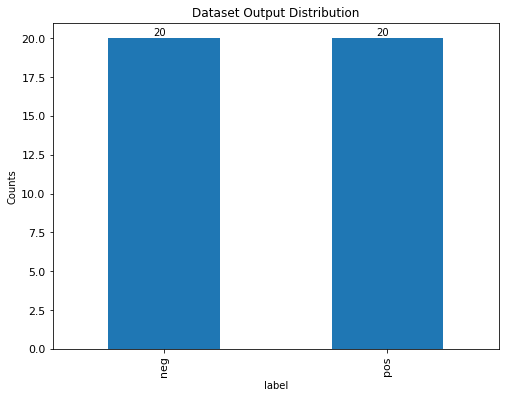

In [7]:
df.label.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11);
plt.title('Dataset Output Distribution', size=12)
plt.xlabel('label')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.05 , y = df.label.value_counts().values[i] + 0.2, 
             s = df.label.value_counts().values[i])
plt.show()